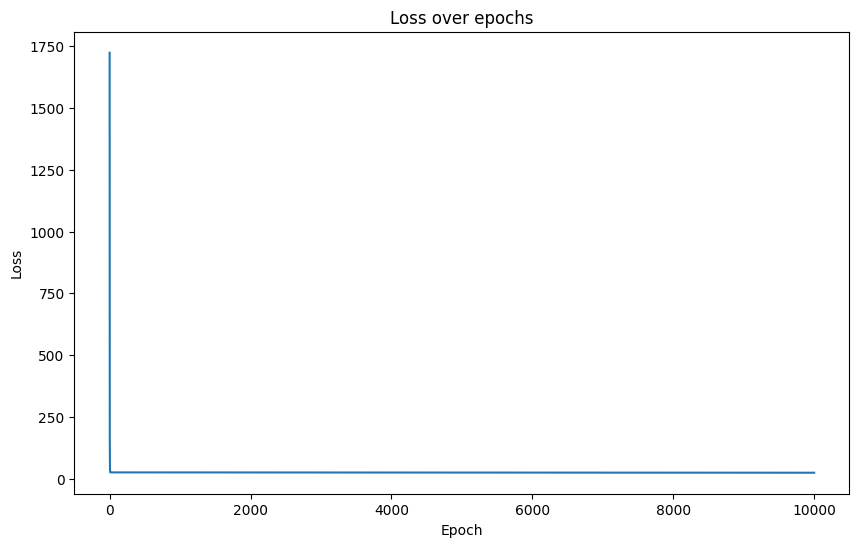

In [18]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your data
data = [
    [2012.917, 32, 84.87882, 10, 24.98298, 121.54024, 37.9],
    [2012.917, 19.5, 306.5947, 9, 24.98034, 121.53951, 42.2],
    [2013.583, 13.3, 561.9845, 5, 24.98746, 121.54391, 47.3],
    [2013.5, 13.3, 561.9845, 5, 24.98746, 121.54391, 54.8],
    [2012.833, 5, 390.5684, 5, 24.97937, 121.54245, 43.1],
    [2012.667, 7.1, 2175.03, 3, 24.96305, 121.51254, 32.1],
    [2012.667, 34.5, 623.4731, 7, 24.97933, 121.53642, 40.3],
    [2013.417, 20.3, 287.6025, 6, 24.98042, 121.54228, 46.7],
    [2013.5, 31.7, 5512.038, 1, 24.95095, 121.48458, 18.8]
]

# Create a DataFrame
df = pd.DataFrame(data, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'])

# Separate features and labels
features = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']].values.astype(np.float64)
labels = df['Y'].values.reshape(-1, 1).astype(np.float64)


# Assuming you have your features in a variable named 'features' and labels in 'labels'

# Define the weight variable
W = tf.Variable(tf.zeros([6, 1], dtype=tf.float64))


# Define the model
def model(X):
    return tf.matmul(X, W)

# Define the loss function (MSE)
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimizer (SGD)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0000001)

losses = []


# Training loop
for epoch in range(10000):
    with tf.GradientTape() as tape:
        y_pred = model(features)
        loss = loss_fn(labels, y_pred)
    gradients = tape.gradient(loss, [W])
    optimizer.apply_gradients(zip(gradients, [W]))

    # Save the current loss
    losses.append(loss.numpy())

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [19]:
loss

<tf.Tensor: shape=(), dtype=float64, numpy=24.93075140287425>